# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

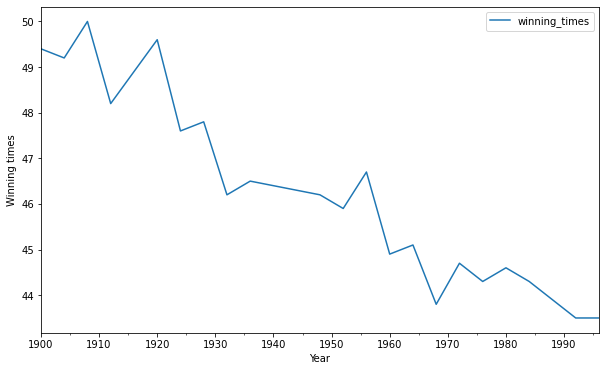

In [7]:
# Plot the time series
data.plot(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Winning times');


If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [8]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

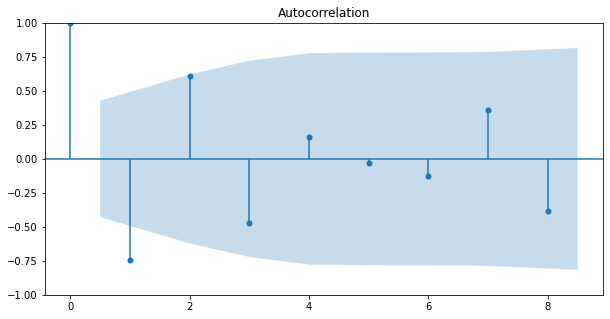

In [17]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (10, 5)
plot_acf(data_diff, lags=8);

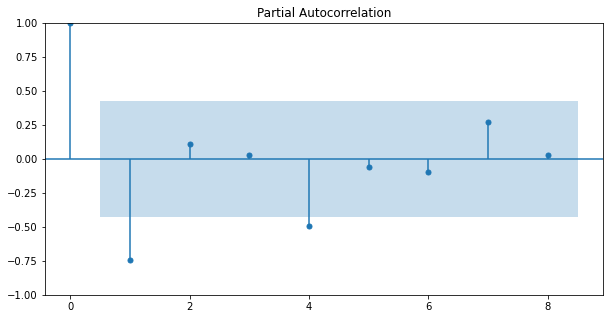

In [15]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (10, 5)
plot_pacf(data_diff, lags=8, method='ywm');

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [19]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# model 1
mod_arma = ARIMA(data_diff, order=(0,1,1))
arma_1 = mod_arma.fit()

print(arma_1.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -28.943
Date:                Sat, 11 Mar 2023   AIC                             61.886
Time:                        23:27:15   BIC                             63.877
Sample:                    12-31-1904   HQIC                            62.274
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9990     54.210     -0.018      0.985    -107.248     105.250
sigma2         0.9097     49.215      0.018      0.985     -95.550      97.369
Ljung-Box (L1) (Q):                  12.63   Jarque-

C:\Users\GM\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [20]:
# model 2
mod_arma = ARIMA(data_diff, order=(2,1,0))
arma_2 = mod_arma.fit()

print(arma_2.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -22.989
Date:                Sat, 11 Mar 2023   AIC                             51.979
Time:                        23:27:33   BIC                             54.966
Sample:                    12-31-1904   HQIC                            52.562
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2245      0.239     -5.116      0.000      -1.694      -0.755
ar.L2         -0.3975      0.267     -1.491      0.136      -0.920       0.125
sigma2         0.5330      0.229      2.328      0.0

In [21]:
# model 3
mod_arma = ARIMA(data_diff, order=(2,1,1))
arma_3 = mod_arma.fit()

print(arma_3.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -20.792
Date:                Sat, 11 Mar 2023   AIC                             49.584
Time:                        23:28:04   BIC                             53.566
Sample:                    12-31-1904   HQIC                            50.361
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8286      0.072    -25.456      0.000      -1.969      -1.688
ar.L2         -0.9287      0.065    -14.225      0.000      -1.057      -0.801
ma.L1          0.9988     33.839      0.030      0.9

## What is your final model? Why did you pick this model?

In [22]:
# Your comments here
'''
best model is model 3 [i.e.(2,1,1) order] because it has the lowest AIC
'''

'\nbest model is model 3 [i.e.(2,1,1) order] because it has the lowest AIC\n'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 